In [1]:
import numpy as np
import pandas as pd
import os
import random

import time
import datetime

import seaborn as sns
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import missingno as msno

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

random_state = 55

In [2]:
train_data = pd.read_csv("training_set_VU_DM.csv")
test_data = pd.read_csv("test_set_VU_DM.csv")

In [3]:
train_set = train_data.copy()
test_set = test_data.copy()

In [4]:
    date = pd.DatetimeIndex(train_set.date_time)
    train_set["month"] = date.month
    train_set["week"] = date.week
    train_set["day"] = date.day
    train_set["hour"] = date.hour
    train_set["month"].value_counts()
    train_set["week"].value_counts()

C:\Users\wl879\AppData\Local\Temp/ipykernel_19612/1928112692.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train_set["week"] = date.week


25    183610
26    175081
24    170043
23    168932
10    166382
22    163799
11    162647
21    161501
20    161080
12    160832
9     159004
19    155132
14    154325
7     151831
8     150628
15    148213
13    147997
6     147811
16    147656
18    146836
3     144236
17    143836
2     138897
4     135440
5     129649
1     120715
45    119950
46    119533
49    114056
48    111208
52    110104
50    108418
51    108161
47    107487
44     63317
Name: week, dtype: int64

Text(0.5, 1.0, 'The Month Distribution')

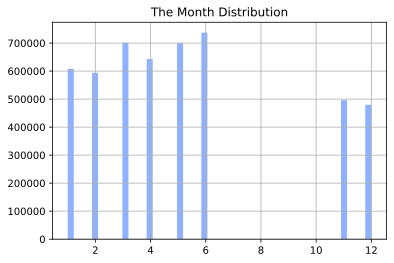

In [5]:
train_set['month'].hist(bins=50,color='#8FB1FE')
plt.title("The Month Distribution")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


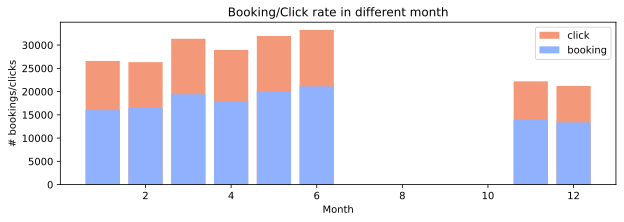

In [6]:
month_behavio = train_set[['booking_bool', 'click_bool', 'month']]

month_behavior = month_behavio.groupby('month').sum()

fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.bar(month_behavior.index.to_list(), month_behavior['click_bool'], label='click',color='#F4987A')
ax.bar(month_behavior.index.to_list(), month_behavior['booking_bool'], label='booking',color='#8FB1FE')
ax.set_title('Booking/Click rate in different month')



ax.set_xlabel('Month')
ax.set_ylabel('# bookings/clicks')

ax.legend()

#train_set['month'].hist(bins=50)
#plt.title("The visitor_hist_adr_usd Distribution")

matplotlib.pyplot.savefig(fname="month.eps",dpi=600,format='eps')
matplotlib.pyplot.savefig(fname="month.png")





The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


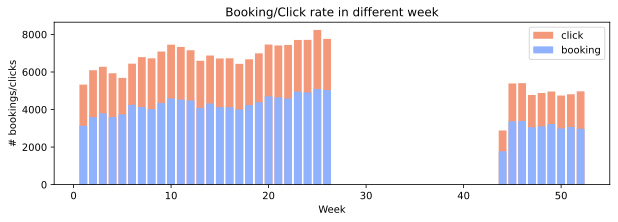

In [8]:
week_behavio = train_set[['booking_bool', 'click_bool', 'week']]

week_behavior = week_behavio.groupby('week').sum()

fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.bar(week_behavior.index.to_list(), week_behavior['click_bool'], label='click',color='#F4987A')
ax.bar(week_behavior.index.to_list(), week_behavior['booking_bool'], label='booking',color='#8FB1FE')
ax.set_title('Booking/Click rate in different week')



ax.set_xlabel('Week')
ax.set_ylabel('# bookings/clicks')

ax.legend()

#train_set['month'].hist(bins=50)
#plt.title("The visitor_hist_adr_usd Distribution")

matplotlib.pyplot.savefig(fname="week.eps",dpi=600,format='eps')
matplotlib.pyplot.savefig(fname="week.png")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


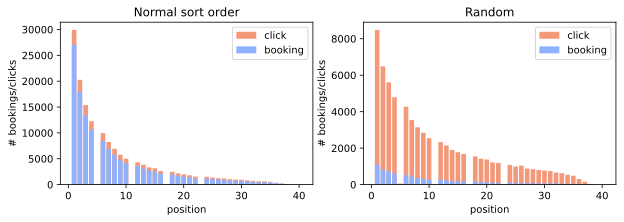

In [9]:
GroupRandom = train_set[['booking_bool', 'click_bool', 'position', 'random_bool']].groupby('random_bool')
GroupPos0 = GroupRandom.get_group(0).groupby('position').sum()
GroupPos1 = GroupRandom.get_group(1).groupby('position').sum()

fig, ax = plt.subplots(1,2, figsize=(10,3))


ax[0].bar(GroupPos0.index.to_list(), GroupPos0['click_bool'], label='click',color='#F4987A')
ax[0].bar(GroupPos0.index.to_list(), GroupPos0['booking_bool'], label='booking',color='#8FB1FE')
ax[0].set_title('Normal sort order')
ax[1].bar(GroupPos1.index.to_list(), GroupPos1['click_bool'], label='click',color='#F4987A')
ax[1].bar(GroupPos1.index.to_list(), GroupPos1['booking_bool'], label='booking',color='#8FB1FE')
ax[1].set_title('Random')

ax[0].set_xlabel('position')
ax[0].set_ylabel('# bookings/clicks')
ax[1].set_xlabel('position')
ax[1].set_ylabel('# bookings/clicks')

ax[0].legend()
ax[1].legend()
matplotlib.pyplot.savefig(fname="position.eps",dpi=600,format='eps')
matplotlib.pyplot.savefig(fname="position.png")

Text(0.5, 1.0, 'The visitor_hist_adr_usd Distribution')

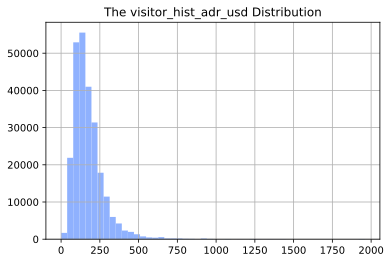

In [10]:
train_set['visitor_hist_adr_usd'].hist(bins=50,color='#8FB1FE')
plt.title("The visitor_hist_adr_usd Distribution")